In [37]:
# 1. Featuer Extraction and normalization

import os
import glob
from pathlib import Path
import cv2
import numpy as np

dog_breed_classes = [
 'n02085620-Chihuahua',
 'n02089078-black-and-tan_coonhound',
 'n02091134-whippet',
 'n02108915-French_bulldog',
]

In [5]:
class ImageFeatureExtractor:

    def __init__(self, breed_classes):
        self.breed_classes = breed_classes

    # 1. get all images and labels
    def get_image_paths_and_labels(self):
        image_paths = [img_path for breed in self.breed_classes for img_path in glob.glob(f"Images/{breed}/*")]
        image_labels = [index for index, breed in enumerate(self.breed_classes) for _ in glob.glob(f"Images/{breed}/*")]
        return image_paths, image_labels

    # 2. convert edge to histogram
    def edge_to_historgram(self, image_path):
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        edges = cv2.Canny(img, 100, 200)    
        hist = np.histogram(edges.ravel(), bins=256, range=[0, 256])[0]
        return hist

extractor = ImageFeatureExtractor(dog_breed_classes)
images, labels = extractor.get_image_paths_and_labels()

# showing first 50 images
for i in range(50):
    print(images[i])

# showing first 50 labels
for i in range(50):
    print(labels[50])

hist = np.array([extractor.edge_to_historgram(image) for image in images])
print(hist)

Images/n02085620-Chihuahua\n02085620_10074.jpg
Images/n02085620-Chihuahua\n02085620_10131.jpg
Images/n02085620-Chihuahua\n02085620_10621.jpg
Images/n02085620-Chihuahua\n02085620_1073.jpg
Images/n02085620-Chihuahua\n02085620_10976.jpg
Images/n02085620-Chihuahua\n02085620_11140.jpg
Images/n02085620-Chihuahua\n02085620_11238.jpg
Images/n02085620-Chihuahua\n02085620_11258.jpg
Images/n02085620-Chihuahua\n02085620_11337.jpg
Images/n02085620-Chihuahua\n02085620_11477.jpg
Images/n02085620-Chihuahua\n02085620_1152.jpg
Images/n02085620-Chihuahua\n02085620_11696.jpg
Images/n02085620-Chihuahua\n02085620_11818.jpg
Images/n02085620-Chihuahua\n02085620_11948.jpg
Images/n02085620-Chihuahua\n02085620_1205.jpg
Images/n02085620-Chihuahua\n02085620_12101.jpg
Images/n02085620-Chihuahua\n02085620_12334.jpg
Images/n02085620-Chihuahua\n02085620_1235.jpg
Images/n02085620-Chihuahua\n02085620_1271.jpg
Images/n02085620-Chihuahua\n02085620_12718.jpg
Images/n02085620-Chihuahua\n02085620_1298.jpg
Images/n02085620-Ch

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_histograms = scaler.fit_transform(histograms)
normalized_histograms

array([[-7.14605820e-02, -5.04390880e-02,  3.65141059e-03, ...,
        -1.13971152e-01, -1.52329863e-01, -1.85703941e-01],
       [-1.95789495e-01, -1.75312257e-01, -8.36645107e-02, ...,
        -6.01224883e-02, -1.64450390e-01, -2.41072448e-01],
       [ 2.02880211e-01,  2.60847616e-01,  2.99912800e-01, ...,
         3.61301836e-01,  2.57040922e-01, -7.95685980e-02],
       ...,
       [ 2.00253544e-01,  3.36727485e-01,  4.97828888e-01, ...,
         1.55272166e-01,  9.58379185e-02, -1.47109271e-01],
       [-7.84650278e-02, -1.24526519e-01, -1.35134949e-01, ...,
         1.11791879e-01,  1.16442814e-01,  7.01665526e+00],
       [ 4.27022476e-01,  3.42403538e-01,  3.58123414e-01, ...,
         5.82716838e-01,  5.57023955e-01,  6.08566248e-02]])

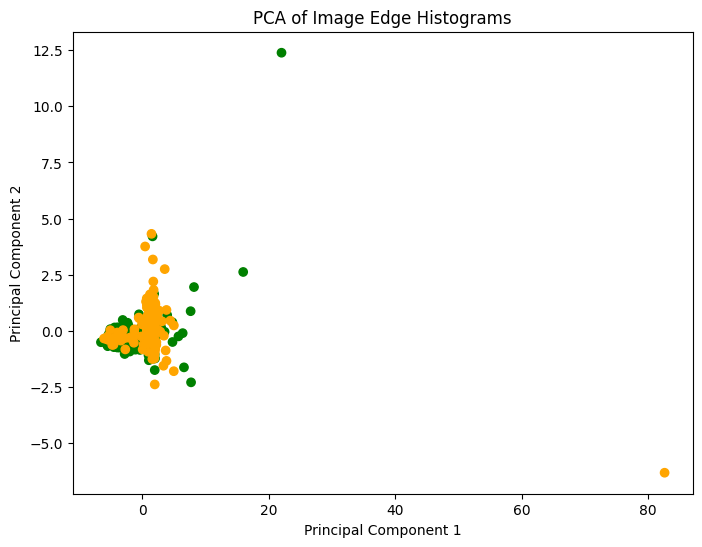

In [14]:
#2.Dimension Reduction

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def load_and_create_histograms(paths):
    edge_histograms = []
    for path in paths:
        image = io.imread(path)
        grayscale_image = color.rgb2gray(image)
        dx = filters.sobel_h(grayscale_image)
        dy = filters.sobel_v(grayscale_image)
        angles = np.arctan2(dy, dx)
        histogram, _ = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
        edge_histograms.append(histogram)
    return np.array(edge_histograms)

def reduce_dimensions_and_plot(histograms, class_labels):
    scaler = StandardScaler()
    normalized_histograms = scaler.fit_transform(histograms)

    pca = PCA(n_components=2)
    reduced_histograms = pca.fit_transform(normalized_histograms)

    plt.figure(figsize=(8, 6))
    color_map = ['green' if label == 'Class 1' else 'orange' for label in class_labels]
    plt.scatter(reduced_histograms[:, 0], reduced_histograms[:, 1], c=color_map)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Image Edge Histograms')
    plt.show()

    return reduced_histograms

def get_paths_and_labels(first_class_path, second_class_path):
    first_class_images = list_images_from_directory(first_class_path)
    second_class_images = list_images_from_directory(second_class_path)
    all_image_paths = first_class_images + second_class_images
    all_labels = ['Class 1'] * len(first_class_images) + ['Class 2'] * len(second_class_images)
    return all_image_paths, all_labels

def list_images_from_directory(directory_path):
    return [os.path.join(directory_path, filename) for filename in os.listdir(directory_path) if filename.lower().endswith(('.jpg', '.png', '.jpeg'))]

coondog_path = "images/n02089078-black-and-tan_coonhound"
french_bulldog_path = "images/n02108915-French_bulldog"

image_paths, labels = get_paths_and_labels(coondog_path, french_bulldog_path)
edge_histograms = load_and_create_histograms(image_paths)
pca_results = reduce_dimensions_and_plot(edge_histograms, labels)

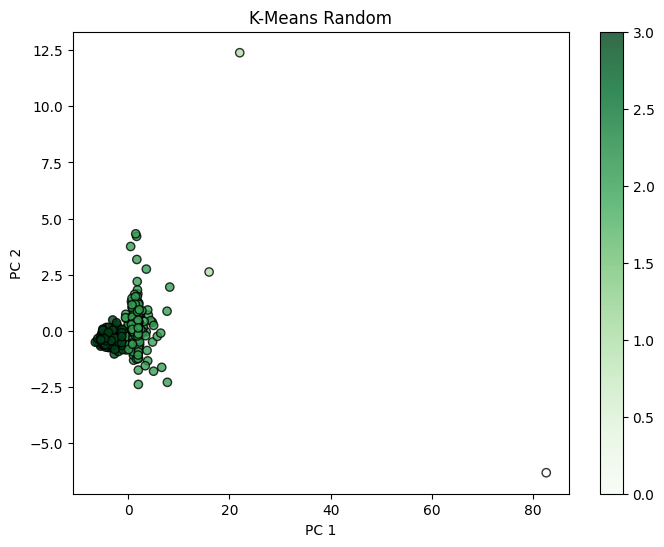

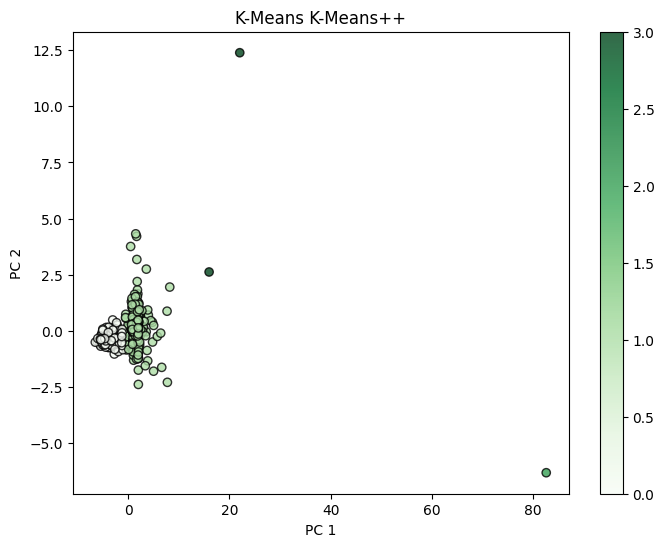

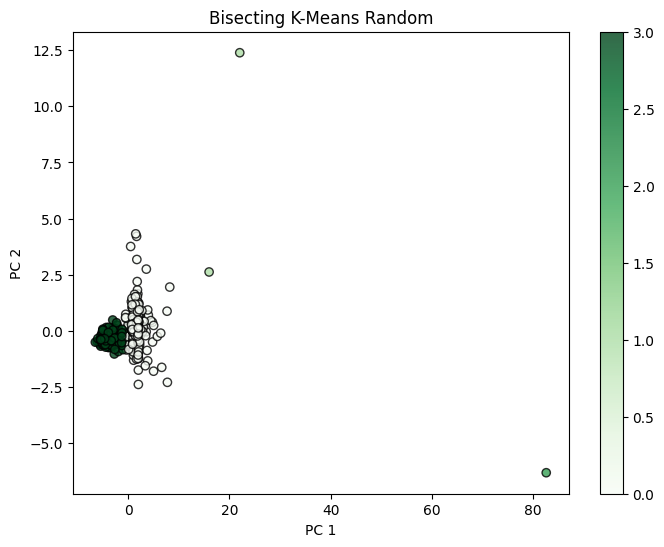

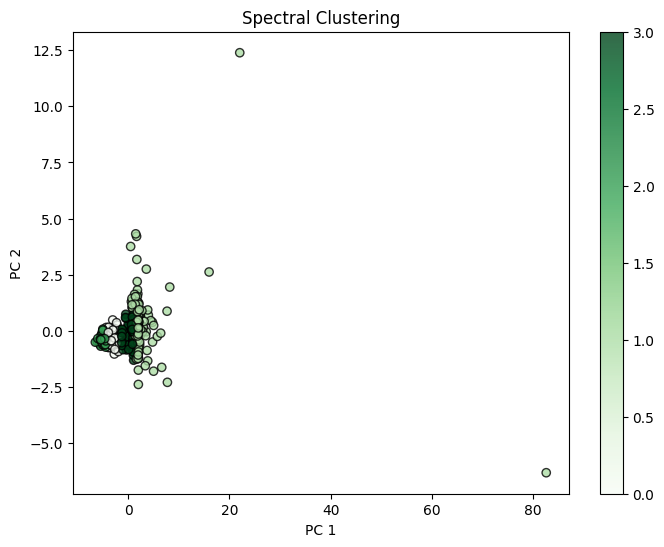

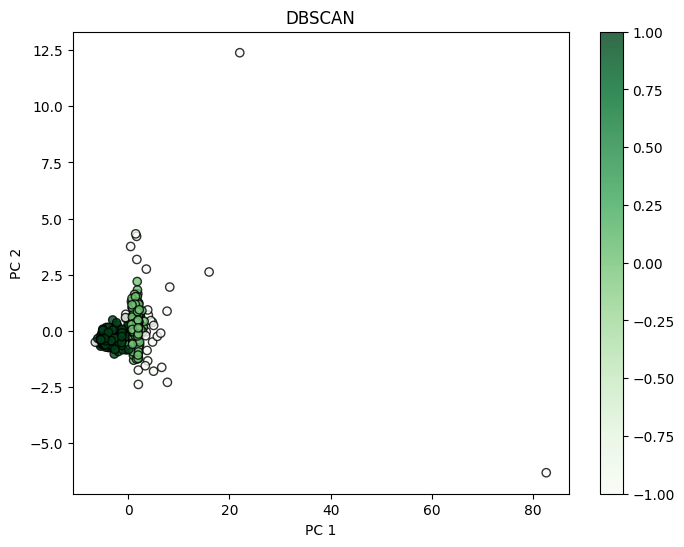

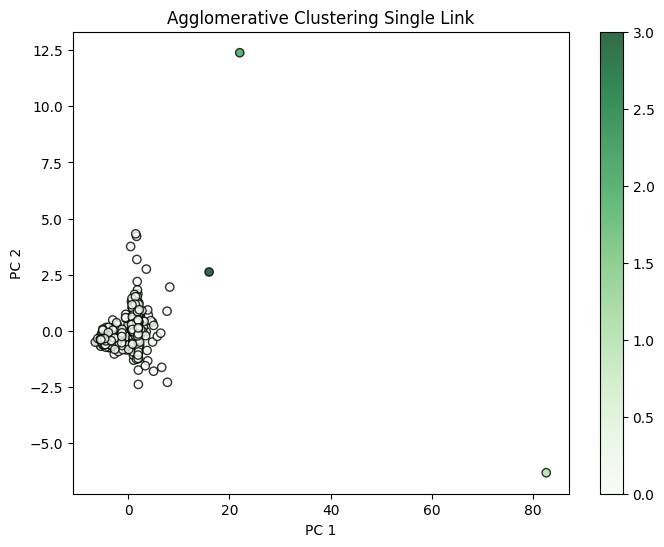

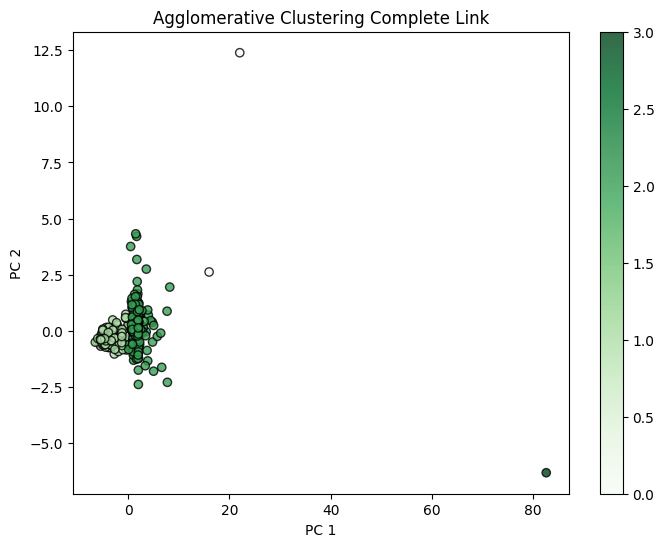

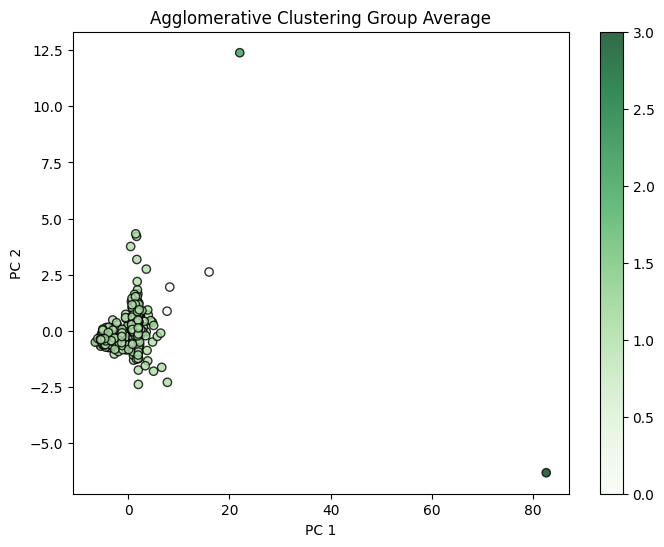

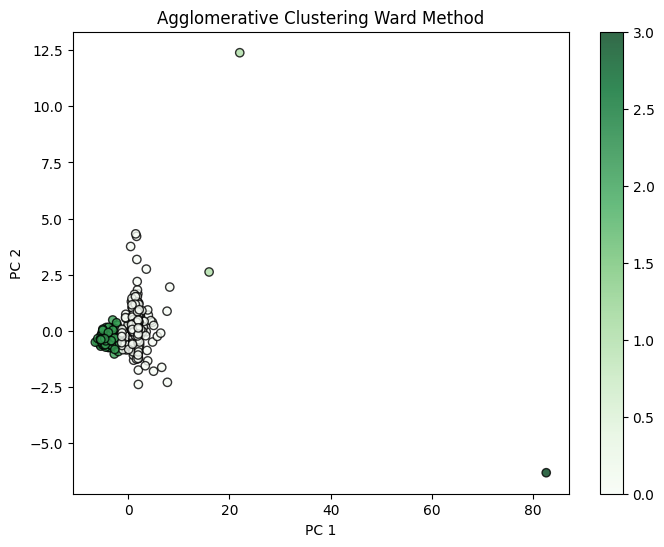

In [25]:
# 3. Clustering Algorithm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN

class ClusteringVisualizer:
    def __init__(self, data, n_clusters=4):
        self.data = data
        self.n_clusters = n_clusters
        self.cluster_methods = {
            'K-Means Random': KMeans(n_clusters=n_clusters, init='random', n_init=10, random_state=42),
            'K-Means K-Means++': KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42),
            'Bisecting K-Means Random': BisectingKMeans(n_clusters=n_clusters, init='random', random_state=42),
            'Spectral Clustering': SpectralClustering(n_clusters=n_clusters, random_state=42, affinity='nearest_neighbors'),
            'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
            'Agglomerative Clustering Single Link': AgglomerativeClustering(n_clusters=n_clusters, linkage='single'),
            'Agglomerative Clustering Complete Link': AgglomerativeClustering(n_clusters=n_clusters, linkage='complete'),
            'Agglomerative Clustering Group Average': AgglomerativeClustering(n_clusters=n_clusters, linkage='average'),
            'Agglomerative Clustering Ward Method': AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        }

    def fit_and_show_clusters(self):
        for name, model in self.cluster_methods.items():
            if hasattr(model, "fit_predict"):
                labels = model.fit_predict(self.data)
            else:
                model.fit(self.data)
                labels = model.labels_
            
            self._plot_clusters(labels, name)

    def _plot_clusters(self, labels, title):
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(self.data[:, 0], self.data[:, 1], c=labels, cmap='Greens', edgecolor='k', alpha=0.8)
        plt.title(title)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.colorbar(scatter)
        plt.show()

clustering_visualizer = ClusteringVisualizer(principal_components)
clustering_visualizer.fit_and_show_clusters()

In [36]:
# 4. Clustering Evaluation

import numpy as np
from sklearn.metrics import fowlkes_mallows_score, silhouette_score

class ClusteringPerformanceEvaluator:
    def __init__(self, data, true_labels):
        self.data = data
        self.true_labels = true_labels
        self.fowlkes_scores = {}
        self.silhouette_scores = {}

    def evaluate(self, cluster_labels):
        for name, labels in cluster_labels.items():
            if len(np.unique(labels)) > 1:
                self.silhouette_scores[name] = silhouette_score(self.data, labels)
            else:
                self.silhouette_scores[name] = None

            if self.true_labels is not None:
                self.fowlkes_scores[name] = fowlkes_mallows_score(self.true_labels, labels)
            else:
                self.fowlkes_scores[name] = None

    def rank_methods(self, scores, score_name):
        valid_scores = {k: v for k, v in scores.items() if v is not None}
        sorted_methods = sorted(valid_scores.items(), key=lambda item: item[1], reverse=True)
        
        print(f"Ranking of Clustering Methods Based on {score_name}:")
        for rank, (method, score) in enumerate(sorted_methods, start=1):
            print(f"{rank}. {method} - Score: {score}")

    def display_scores(self):
        for name in self.fowlkes_scores:
            print(f"{name}:\nFowlkes-Mallows Score: {self.fowlkes_scores.get(name)},\nSilhouette Score: {self.silhouette_scores.get(name)}\n")


cluster_labels = {
    'K-Mean Random Init': clustering_visualizer.cluster_methods['K-Means Random'].labels_,
    'K-Mean ++ Init': clustering_visualizer.cluster_methods['K-Means K-Means++'].labels_,
    'Bisecting K-Mean Random Init': clustering_visualizer.cluster_methods['Bisecting K-Means Random'].labels_,
    'Spectral Clustering Default': clustering_visualizer.cluster_methods['Spectral Clustering'].labels_,
    'DBSCAN Default': clustering_visualizer.cluster_methods['DBSCAN'].labels_,
    'Single Link': clustering_visualizer.cluster_methods['Agglomerative Clustering Single Link'].labels_,
    'Complete Link': clustering_visualizer.cluster_methods['Agglomerative Clustering Complete Link'].labels_,
    'Group Average': clustering_visualizer.cluster_methods['Agglomerative Clustering Group Average'].labels_,
    'Ward’s Method': clustering_visualizer.cluster_methods['Agglomerative Clustering Ward Method'].labels_
}

performance_evaluator = ClusteringPerformanceEvaluator(principal_components, labels)
performance_evaluator.evaluate(cluster_labels)
performance_evaluator.display_scores()
performance_evaluator.rank_methods(performance_evaluator.fowlkes_scores, "Fowlkes-Mallows")
performance_evaluator.rank_methods(performance_evaluator.silhouette_scores, "Silhouette Coefficient")

K-Mean Random Init:
Fowlkes-Mallows Score: 0.6306955237874884,
Silhouette Score: 0.655477705825095

K-Mean ++ Init:
Fowlkes-Mallows Score: 0.6333935056680846,
Silhouette Score: 0.655251686409653

Bisecting K-Mean Random Init:
Fowlkes-Mallows Score: 0.6418586125332113,
Silhouette Score: 0.6524118199705212

Spectral Clustering Default:
Fowlkes-Mallows Score: 0.462201531580975,
Silhouette Score: 0.22705476161077692

DBSCAN Default:
Fowlkes-Mallows Score: 0.6063684780559772,
Silhouette Score: 0.5505094511183899

Single Link:
Fowlkes-Mallows Score: 0.699305744953771,
Silhouette Score: 0.7669661921989503

Complete Link:
Fowlkes-Mallows Score: 0.6483639167583226,
Silhouette Score: 0.6260347503393648

Group Average:
Fowlkes-Mallows Score: 0.6949659097627225,
Silhouette Score: 0.6591806558984479

Ward’s Method:
Fowlkes-Mallows Score: 0.6302319026616593,
Silhouette Score: 0.6525432903393298

Ranking of Clustering Methods Based on Fowlkes-Mallows:
1. Single Link - Score: 0.699305744953771
2. Grou